# Postdam PM2.5 ARIMA Forcasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
# import src
import model_base as mb
import eda as eda
import arima as ar

## Data Exploration

* Load Data


In [3]:
df= mb.get_cleaned_datetime_df()
df.head()

,Start_Timestamp,End_Timestamp,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1356998400,1357002000,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,1357002000,1357005600,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,1357005600,1357009200,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,1357009200,1357012800,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,1357012800,1357016400,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [4]:
# Set Index
df['Start'] = pd.to_datetime(df['Start'])
mb.set_start_index(df, 'Start')
df.head()

,Start_Timestamp,End_Timestamp,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1356998400,1357002000,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
2013-01-01 01:00:00,1357002000,1357005600,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2013-01-01 02:00:00,1357005600,1357009200,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 03:00:00,1357009200,1357012800,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 04:00:00,1357012800,1357016400,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [ ]:
result_df = eda.check_seasonality_and_trend(df, 'PM2.5-Value', freq='H')
if 'Error' in result_df.columns:
    print(result_df['Error'][0])
else:
    print(result_df)

# ARIMA

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
ARIMA(p,d,q) are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


In [ ]:
## Auto Arima Forecasting in Python
In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [ ]:
auto_arima_model = ar.init_auto_model(df)

print(auto_arima_model.summary())

## Splitting Data 

Train, Validation and Test data

In [7]:
train_data, validation_data, test_data = mb.split_data(df)

Training set size: 52588
Validation set size: 17529
Test set size: 17531


In [8]:
# Scale the features
X_train_scaled, X_val_scaled, X_test_scaled = mb.scale_features(train_data, validation_data, test_data)

## Principle Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In [9]:
# Apply PCA on the scaled data
pca = mb.init_pca()
pca.fit(X_train_scaled) 

PCA(n_components=0.95)

In [10]:
# Transform the datasets using the fitted PCA
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [11]:
# Extract the target variable
y_train, y_val, y_test = mb.extract_target(train_data, validation_data, test_data)

## Model Creation
* Initialize Linear Regression Model
* Train model

In [12]:
# Initialize and train the linear regression model
model = ar.init_arimax_model(df)
fitted_model = model.fit()

/Users/tugcekonuklar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37403D+00    |proj g|=  1.25836D+00


 This problem is unconstrained.



At iterate    5    f=  2.14297D+00    |proj g|=  1.46632D-01

At iterate   10    f=  1.99085D+00    |proj g|=  1.19404D-01

At iterate   15    f=  1.97817D+00    |proj g|=  4.57609D-02

At iterate   20    f=  1.97453D+00    |proj g|=  3.49107D-03

At iterate   25    f=  1.97450D+00    |proj g|=  8.75568D-04

At iterate   30    f=  1.97447D+00    |proj g|=  2.39302D-03

At iterate   35    f=  1.97447D+00    |proj g|=  4.67138D-04

At iterate   40    f=  1.97447D+00    |proj g|=  1.00953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     40     45      1     0     0   1.010D-04   1.974D+00
  F =   1.97446584496

# Evaluation 

## With Validation Data

Error metrics MAE, MSE, RMSE, MASE, MAPE

* Regarding the MASE metric, calculating it requires a baseline prediction model for the time series, which is typically done by using the last observed value to predict the next (in the simplest case) or using more complex methods like ARIMA for one-step ahead forecasting. This is not included in the above script as it would require additional steps to implement the naive forecasting method for a time series.

### Predict Validation


In [13]:
# Make predictions on the validation set
y_val_pred = fitted_model.get_prediction(start=y_val.index[0], end=y_val.index[-1], exog=X_val_pca)
val_predictions_mean = y_val_pred.predicted_mean

print(y_val_pred)
print(val_predictions_mean)


2019-01-01 04:00:00    13.862914
2019-01-01 05:00:00    12.197417
2019-01-01 06:00:00     9.480523
2019-01-01 07:00:00     9.436426
2019-01-01 08:00:00     9.612215
                         ...    
2020-12-31 08:00:00     8.653282
2020-12-31 09:00:00     8.908871
2020-12-31 10:00:00     8.788003
2020-12-31 11:00:00     7.924465
2020-12-31 12:00:00     6.823563
Freq: H, Name: predicted_mean, Length: 17529, dtype: float64


In [14]:
# Error Metric
mb.evolve_error_metrics(y_val,val_predictions_mean)
mb.naive_mean_absolute_scaled_error(y_val,val_predictions_mean)

MAE: 0.7924
MSE: 1.9005
RMSE: 1.3786
MAPE: 0.1064
MASE: 0.7645550948205843


0.7645550948205843

## With Test Data


In [15]:
# Predict on the test set
y_test_pred = fitted_model.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test_pca)
test_predictions_mean = y_test_pred.predicted_mean

print(y_val_pred)
print(test_predictions_mean)

# Error Metric
mb.evolve_error_metrics(y_test,test_predictions_mean)
mb.naive_mean_absolute_scaled_error(y_test,test_predictions_mean)

2020-12-31 13:00:00    7.767410
2020-12-31 14:00:00    7.087885
2020-12-31 15:00:00    7.759115
2020-12-31 16:00:00    7.908236
2020-12-31 17:00:00    7.701513
                         ...   
2022-12-31 19:00:00    7.733103
2022-12-31 20:00:00    5.320782
2022-12-31 21:00:00    7.432647
2022-12-31 22:00:00    6.129666
2022-12-31 23:00:00    7.222267
Freq: H, Name: predicted_mean, Length: 17531, dtype: float64
MAE: 0.7720
MSE: 1.8730
RMSE: 1.3686
MAPE: 0.0949
MASE: 0.7147414986700937


0.7147414986700937

## Plot Table 


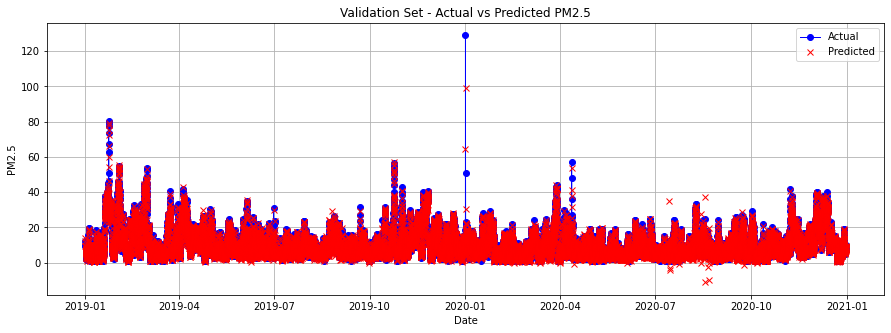

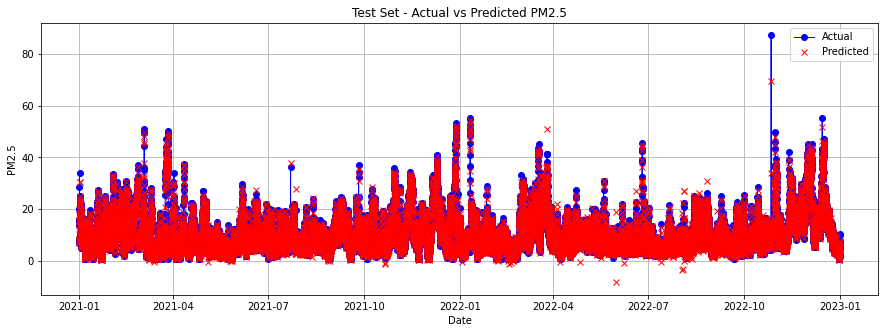

In [16]:
mb.plot_pm_true_predict(validation_data, val_predictions_mean, 'Validation')
mb.plot_pm_true_predict(test_data, test_predictions_mean, 'Test')

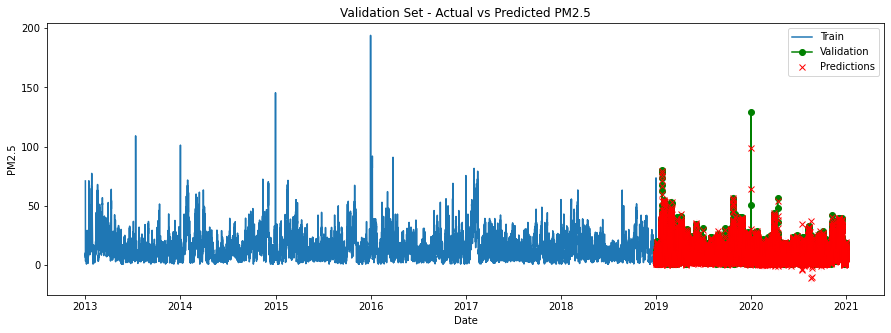

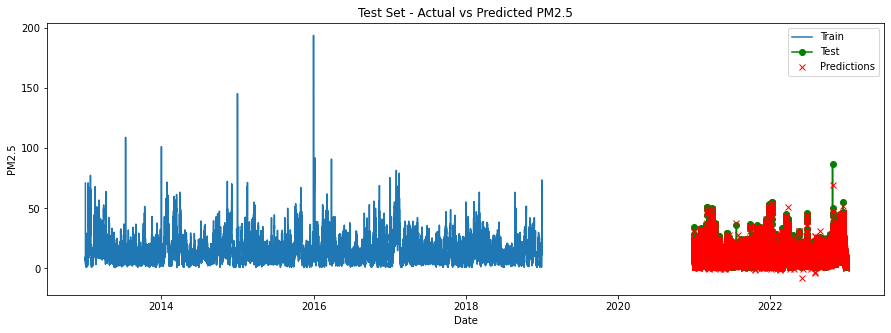

In [18]:
mb.plot_time_series(train_data, y_train,validation_data, y_val,val_predictions_mean,y_val_pred, 'Validation')
mb.plot_time_series(train_data, y_train,test_data, y_test,test_predictions_mean,y_test_pred, 'Test')

# HyperPramater Tuning
Was made by using auto_arima lib.